# Задача 1
## Минимизация гладкой функции
Импортируем библиотеки

In [25]:
import numpy as np
import scipy.optimize
from matplotlib import pylab as plt

Определяем рабочую функцию

In [3]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Нарисуем её графон

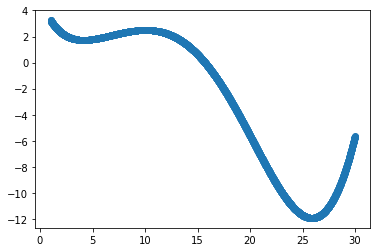

In [31]:
x_f = np.arange(1, 30, 0.01)
plt.plot(x_f, f(x), 'o') 
plt.show()

ПРобуем запустить функию minimize только с базовыми параметрами

In [17]:
x0 = np.array([24])
scipy.optimize.minimize(f, x0)

      fun: -11.898894665980267
 hess_inv: array([[1.68562669]])
      jac: array([1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([25.88019491])

Пробуем воспользоваться точным градиентным методом BFG с начальной точкой 2

In [18]:
x0 = np.array([2])
scipy.optimize.minimize(f, x0, method='BFGS')

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Пробуем воспользоваться точным градиентным методом BFG с начальной точкой 30

In [27]:
x0 = np.array([30])
scipy.optimize.minimize(f, x0, method='BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

# Задача 2
## Разбираемся с методом дифферениальной эволюции

Запускаем метод дифееренциальной эволюции для функции f(x) с границами х (1, 30)

In [29]:
scipy.optimize.differential_evolution(f, [(1, 30)])

     fun: array([-11.89889467])
     jac: array([6.03961275e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88020281])

# Задача 3
## Минимизируем негладкую функцию

Исследуем функцию h(x) = int(f(x)). Она негладкая

In [30]:
def h(x):
    return int(f(x))

Построим её график

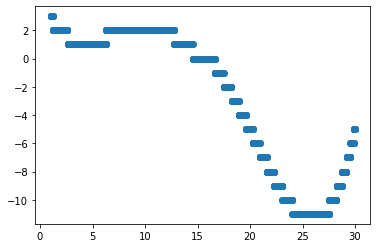

In [37]:
h_values = list(map(h, x))
plt.plot(x, h_values, 'o')
plt.show()

Пробуем использовать градиентный метод BFGS из точки 30

In [44]:
scipy.optimize.minimize(h, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

Пробуем применить метод дифференциальной эволюции

In [40]:
scipy.optimize.differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([24.56308])